In [29]:
%reload_ext lab_black
import pandas as pd
import numpy as np
from plotnine import *

In [30]:
# read data
od_pop = pd.read_csv(
    "https://raw.githubusercontent.com/MIDS-at-Duke/estimating-impact-of-opioids-2020-purlple-team/ssloate/20_intermediate_files/death_data_with_pop.csv?token=ARFW6VZ6KS4AESBQDJD2D2C7UL5JG"
)

In [31]:
od_pop = od_pop.drop(columns="Unnamed: 0")

In [32]:
# define policy years
FL_policy_year = 2010
TX_policy_year = 2007
WA_policy_year = 2012

# define polic year list
policy_years = [FL_policy_year, TX_policy_year, WA_policy_year]

In [33]:
# define states being looked at

states_needed = ["FL", "TX", "WA"]

In [34]:
# graph pre-post for FL, TX, WA

for i in range(len(policy_years)):
    p = (
        ggplot()
        + geom_smooth(
            od_pop.loc[
                (od_pop["State Abbr"] == states_needed[i])
                & (od_pop["Year"] < policy_years[i])
            ],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            od_pop.loc[
                (od_pop["State Abbr"] == states_needed[i])
                & (od_pop["Year"] >= policy_years[i])
            ],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_vline(xintercept=policy_years[i], linetype="dotted")
        + xlab("Year")
        + ylab("Deaths Per 100,000 People")
        + theme_classic(base_family="Times")
        + scale_x_continuous(
            breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
        )
        + labs(title="Opioid Overdoses per Capita, " + states_needed[i])
    )
    ggsave(
        plot=p,
        filename="Deaths: " + states_needed[i] + "_pre_post",
        path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results",
        dpi=100,
    )

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/Deaths: FL_pre_post
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/Deaths: TX_pre_post
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/

In [35]:
# graph all FL DiDs in a loop to determine which looks the most similar

states = od_pop["State"].unique()

for i in range(len(states)):

    # define dummy variable column for each state at a time
    od_pop["dummy"] = 0

    od_pop.loc[
        (od_pop.State == states[i]),
        "dummy",
    ] = 1

    p = (
        ggplot()
        + geom_smooth(
            od_pop.loc[(od_pop["dummy"] == 1) & (od_pop["Year"] < FL_policy_year)],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            od_pop.loc[(od_pop["dummy"] == 1) & (od_pop["Year"] >= FL_policy_year)],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            od_pop.loc[
                (od_pop["State Abbr"] == "FL") & (od_pop["Year"] < FL_policy_year)
            ],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            od_pop.loc[
                (od_pop["State Abbr"] == "FL") & (od_pop["Year"] >= FL_policy_year)
            ],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_vline(xintercept=FL_policy_year, linetype="dotted")
        + xlab("Year")
        + ylab("Deaths Per 100,000 People")
        + theme_classic(base_family="Times")
        + scale_x_continuous(
            breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
        )
        + labs(title="Opioid Overdoses per Capita")
    )
    ggsave(
        plot=p,
        filename="Deaths: FL vs. " + states[i] + "_pre_post.png",
        path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID",
        dpi=100,
    )

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID/Deaths: FL vs. Alabama_pre_post.png
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID/Deaths: FL vs. Arizona_pre_post.png
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: Plotni

In [37]:
# graph all TX DiDs in a loop to determine which looks the most similar

states = od_pop["State"].unique()

for i in range(len(states)):

    # define dummy variable column for each state at a time
    od_pop["dummy"] = 0

    od_pop.loc[
        (od_pop.State == states[i]),
        "dummy",
    ] = 1

    p = (
        ggplot()
        + geom_smooth(
            od_pop.loc[(od_pop["dummy"] == 1) & (od_pop["Year"] < TX_policy_year)],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            od_pop.loc[(od_pop["dummy"] == 1) & (od_pop["Year"] >= TX_policy_year)],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            od_pop.loc[
                (od_pop["State Abbr"] == "TX") & (od_pop["Year"] < TX_policy_year)
            ],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            od_pop.loc[
                (od_pop["State Abbr"] == "TX") & (od_pop["Year"] >= TX_policy_year)
            ],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_vline(xintercept=TX_policy_year, linetype="dotted")
        + xlab("Year")
        + ylab("Deaths Per 100,000 People")
        + theme_classic(base_family="Times")
        + scale_x_continuous(
            breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
        )
        + labs(title="Opioid Overdoses per Capita")
    )
    ggsave(
        plot=p,
        filename="Deaths: TX vs. " + states[i] + "_DID.png",
        path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/TX_DID",
        dpi=100,
    )

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/TX_DID/Deaths: TX vs. Alabama_DID.png
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/TX_DID/Deaths: TX vs. Arizona_DID.png
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning:

In [38]:
# graph all WA DiDs in a loop to determine which looks the most similar

states = od_pop["State"].unique()

for i in range(len(states)):

    # define dummy variable column for each state at a time
    od_pop["dummy"] = 0

    od_pop.loc[
        (od_pop.State == states[i]),
        "dummy",
    ] = 1

    p = (
        ggplot()
        + geom_smooth(
            od_pop.loc[(od_pop["dummy"] == 1) & (od_pop["Year"] < WA_policy_year)],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            od_pop.loc[(od_pop["dummy"] == 1) & (od_pop["Year"] >= WA_policy_year)],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            od_pop.loc[
                (od_pop["State Abbr"] == "WA") & (od_pop["Year"] < WA_policy_year)
            ],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            od_pop.loc[
                (od_pop["State Abbr"] == "WA") & (od_pop["Year"] >= WA_policy_year)
            ],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_vline(xintercept=TX_policy_year, linetype="dotted")
        + xlab("Year")
        + ylab("Deaths Per 100,000 People")
        + theme_classic(base_family="Times")
        + scale_x_continuous(
            breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
        )
        + labs(title="Opioid Overdoses per Capita")
    )
    ggsave(
        plot=p,
        filename="Deaths: WA vs. " + states[i] + "_DID.png",
        path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/WA_DID",
        dpi=100,
    )

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/WA_DID/Deaths: WA vs. Alabama_DID.png
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/WA_DID/Deaths: WA vs. Arizona_DID.png
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning:

## Our chosen states for deaths comparison are:

Washington: CO, CT, KS, MA, NJ, OR  
Texas: WV, VA, NV, LA, ID, CO  
Florida: TN, NC, NH, IA, IL, GA

In [39]:
# define chosen states

FL_chosen_states = [
    "Tennessee",
    "North Carolina",
    "New Hampshire",
    "Iowa",
    "Illinois",
    "Georgia",
]
TX_chosen_states = [
    "West Virginia",
    "Virginia",
    "Nevada",
    "Louisiana",
    "Idaho",
    "Colorado",
]
WA_chosen_states = [
    "Colorado",
    "Connecticut",
    "Kansas",
    "Massachusetts",
    "New Jersey",
    "Oregon",
]

In [40]:
# define dummy variable column and state label column for FL states "Tennessee", "North Carolina", "New Hampshire", "Iowa", "Illinois", & "Georgia")
od_pop["dummy"] = 0
od_pop["labels"] = 0

FL_label = ", ".join(map(str, FL_chosen_states))

# run loop with a 1 in "dummy" column if that state is one of the chosen FL comparison states
for j in range(len(od_pop)):
    for i in range(len(FL_chosen_states)):
        if od_pop.State[j] == FL_chosen_states[i]:
            od_pop.at[j, "dummy"] = 1
            label = ", ".join(FL_chosen_states)
            od_pop.loc[od_pop.dummy == 1, "labels"] = label

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/Deaths: FL_DID_aggregates_averages


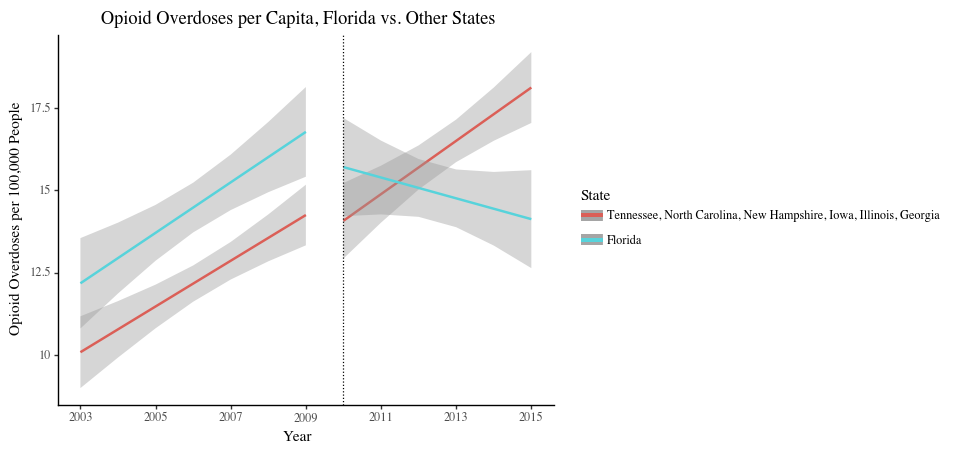

<ggplot: (8773236575453)>


In [42]:
# graph FL DiD with chosen states

p = (
    ggplot()
    # plot all chosen states,  pre 2010
    + geom_smooth(
        od_pop.loc[(od_pop["dummy"] == 1) & (od_pop["Year"] < FL_policy_year)],
        aes(x="Year", y="Deaths Per 100,000 People", color="labels"),
        method="lm",
    )
    # plot all chosen states, post 2010
    + geom_smooth(
        od_pop.loc[(od_pop["dummy"] == 1) & (od_pop["Year"] >= FL_policy_year)],
        aes(x="Year", y="Deaths Per 100,000 People", color="labels"),
        method="lm",
    )
    # plot Florida, pre 2010
    + geom_smooth(
        od_pop.loc[(od_pop["State Abbr"] == "FL") & (od_pop["Year"] < FL_policy_year)],
        aes(x="Year", y="Deaths Per 100,000 People", color="State"),
        method="lm",
    )
    # plot Florida, post 2010
    + geom_smooth(
        od_pop.loc[(od_pop["State Abbr"] == "FL") & (od_pop["Year"] >= FL_policy_year)],
        aes(x="Year", y="Deaths Per 100,000 People", color="State"),
        method="lm",
    )
    + geom_vline(xintercept=FL_policy_year, linetype="dotted")
    + xlab("Year")
    + ylab("Opioid Overdoses per 100,000 People")
    + theme_classic(base_family="Times")
    + scale_x_continuous(
        breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
    )
    + labs(title="Opioid Overdoses per Capita, Florida vs. Other States", color="State")
)
ggsave(
    plot=p,
    filename="Deaths: FL_DID_aggregates_averages",
    path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/",
)
print(p)

In [43]:
# define dummy variable column and state label column for TX states
od_pop["dummy"] = 0
od_pop["labels"] = 0
TX_label = ", ".join(map(str, TX_chosen_states))
for j in range(len(od_pop)):
    for i in range(len(TX_chosen_states)):
        if od_pop.State[j] == TX_chosen_states[i]:
            od_pop.at[j, "dummy"] = 1
            label = ", ".join(TX_chosen_states)
            od_pop.loc[od_pop.dummy == 1, "labels"] = label

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/Deaths: TX_DID_aggregates_averages


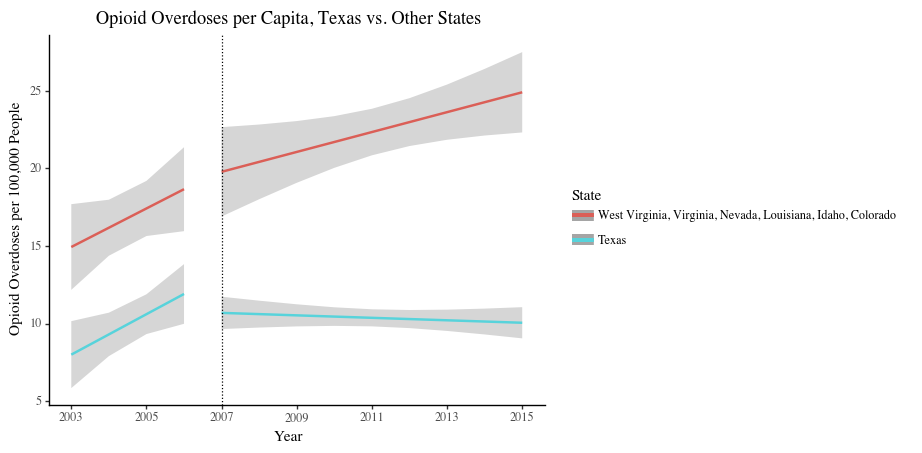

<ggplot: (8773208733057)>


In [44]:
p = (
    ggplot()
    # plot all chosen states,  pre 2010
    + geom_smooth(
        od_pop.loc[(od_pop["dummy"] == 1) & (od_pop["Year"] < TX_policy_year)],
        aes(x="Year", y="Deaths Per 100,000 People", color="labels"),
        method="lm",
    )
    # plot all chosen states, post 2010
    + geom_smooth(
        od_pop.loc[(od_pop["dummy"] == 1) & (od_pop["Year"] >= TX_policy_year)],
        aes(x="Year", y="Deaths Per 100,000 People", color="labels"),
        method="lm",
    )
    # plot Florida, pre 2010
    + geom_smooth(
        od_pop.loc[(od_pop["State Abbr"] == "TX") & (od_pop["Year"] < TX_policy_year)],
        aes(x="Year", y="Deaths Per 100,000 People", color="State"),
        method="lm",
    )
    # plot Florida, post 2010
    + geom_smooth(
        od_pop.loc[(od_pop["State Abbr"] == "TX") & (od_pop["Year"] >= TX_policy_year)],
        aes(x="Year", y="Deaths Per 100,000 People", color="State"),
        method="lm",
    )
    + geom_vline(xintercept=TX_policy_year, linetype="dotted")
    + xlab("Year")
    + ylab("Opioid Overdoses per 100,000 People")
    + theme_classic(base_family="Times")
    + scale_x_continuous(
        breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
    )
    + labs(title="Opioid Overdoses per Capita, Texas vs. Other States", color="State")
)
ggsave(
    plot=p,
    filename="Deaths: TX_DID_aggregates_averages",
    path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/",
)
print(p)

In [45]:
# define dummy variable column and state label column for WA states
od_pop["dummy"] = 0
od_pop["labels"] = 0
WA_label = ", ".join(map(str, WA_chosen_states))
for j in range(len(od_pop)):
    for i in range(len(WA_chosen_states)):
        if od_pop.State[j] == WA_chosen_states[i]:
            od_pop.at[j, "dummy"] = 1
            label = ", ".join(WA_chosen_states)
            od_pop.loc[od_pop.dummy == 1, "labels"] = label

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/Deaths: WA_DID_aggregates_averages


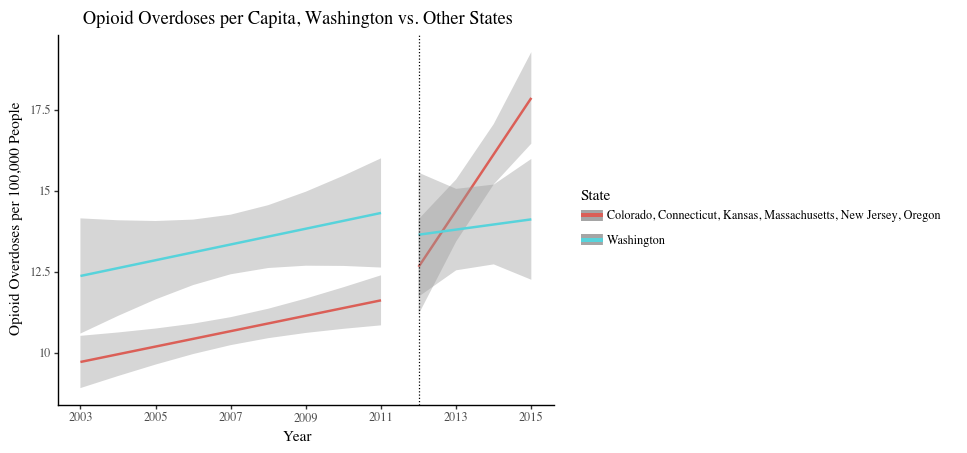

<ggplot: (8773214518873)>


In [46]:
p = (
    ggplot()
    # plot all chosen states,  pre 2010
    + geom_smooth(
        od_pop.loc[(od_pop["dummy"] == 1) & (od_pop["Year"] < WA_policy_year)],
        aes(x="Year", y="Deaths Per 100,000 People", color="labels"),
        method="lm",
    )
    # plot all chosen states, post 2010
    + geom_smooth(
        od_pop.loc[(od_pop["dummy"] == 1) & (od_pop["Year"] >= WA_policy_year)],
        aes(x="Year", y="Deaths Per 100,000 People", color="labels"),
        method="lm",
    )
    # plot Florida, pre 2010
    + geom_smooth(
        od_pop.loc[(od_pop["State Abbr"] == "WA") & (od_pop["Year"] < WA_policy_year)],
        aes(x="Year", y="Deaths Per 100,000 People", color="State"),
        method="lm",
    )
    # plot Florida, post 2010
    + geom_smooth(
        od_pop.loc[(od_pop["State Abbr"] == "WA") & (od_pop["Year"] >= WA_policy_year)],
        aes(x="Year", y="Deaths Per 100,000 People", color="State"),
        method="lm",
    )
    + geom_vline(xintercept=WA_policy_year, linetype="dotted")
    + xlab("Year")
    + ylab("Opioid Overdoses per 100,000 People")
    + theme_classic(base_family="Times")
    + scale_x_continuous(
        breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
    )
    + labs(
        title="Opioid Overdoses per Capita, Washington vs. Other States", color="State"
    )
)
ggsave(
    plot=p,
    filename="Deaths: WA_DID_aggregates_averages",
    path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/",
)
print(p)